# Car Price Prediction Model

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [2]:
data = pd.read_csv('car data.csv')

In [3]:
data.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


## Preprocessing

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [5]:
data.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [6]:
data.drop('Car_Name',axis=1,inplace=True)

In [7]:
data['Age'] = 2021-data['Year']

In [8]:
data.drop('Year',axis=1,inplace=True)

In [9]:
data['Fuel_Type'].unique()

array(['Petrol', 'Diesel', 'CNG'], dtype=object)

In [10]:
data['Seller_Type'].unique()

array(['Dealer', 'Individual'], dtype=object)

In [11]:
data['Transmission'].unique()

array(['Manual', 'Automatic'], dtype=object)

In [12]:
data = pd.get_dummies(data,drop_first=True)

In [13]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [14]:
data['Seller_Type_Individual'].value_counts()

0    195
1    106
Name: Seller_Type_Individual, dtype: int64

## Data Visualisation

In [15]:
data.corr()['Selling_Price']

Selling_Price             1.000000
Present_Price             0.878983
Kms_Driven                0.029187
Owner                    -0.088344
Age                      -0.236141
Fuel_Type_Diesel          0.552339
Fuel_Type_Petrol         -0.540571
Seller_Type_Individual   -0.550724
Transmission_Manual      -0.367128
Name: Selling_Price, dtype: float64

array([[<AxesSubplot:title={'center':'Selling_Price'}>,
        <AxesSubplot:title={'center':'Present_Price'}>,
        <AxesSubplot:title={'center':'Kms_Driven'}>],
       [<AxesSubplot:title={'center':'Owner'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Fuel_Type_Diesel'}>],
       [<AxesSubplot:title={'center':'Fuel_Type_Petrol'}>,
        <AxesSubplot:title={'center':'Seller_Type_Individual'}>,
        <AxesSubplot:title={'center':'Transmission_Manual'}>]],
      dtype=object)

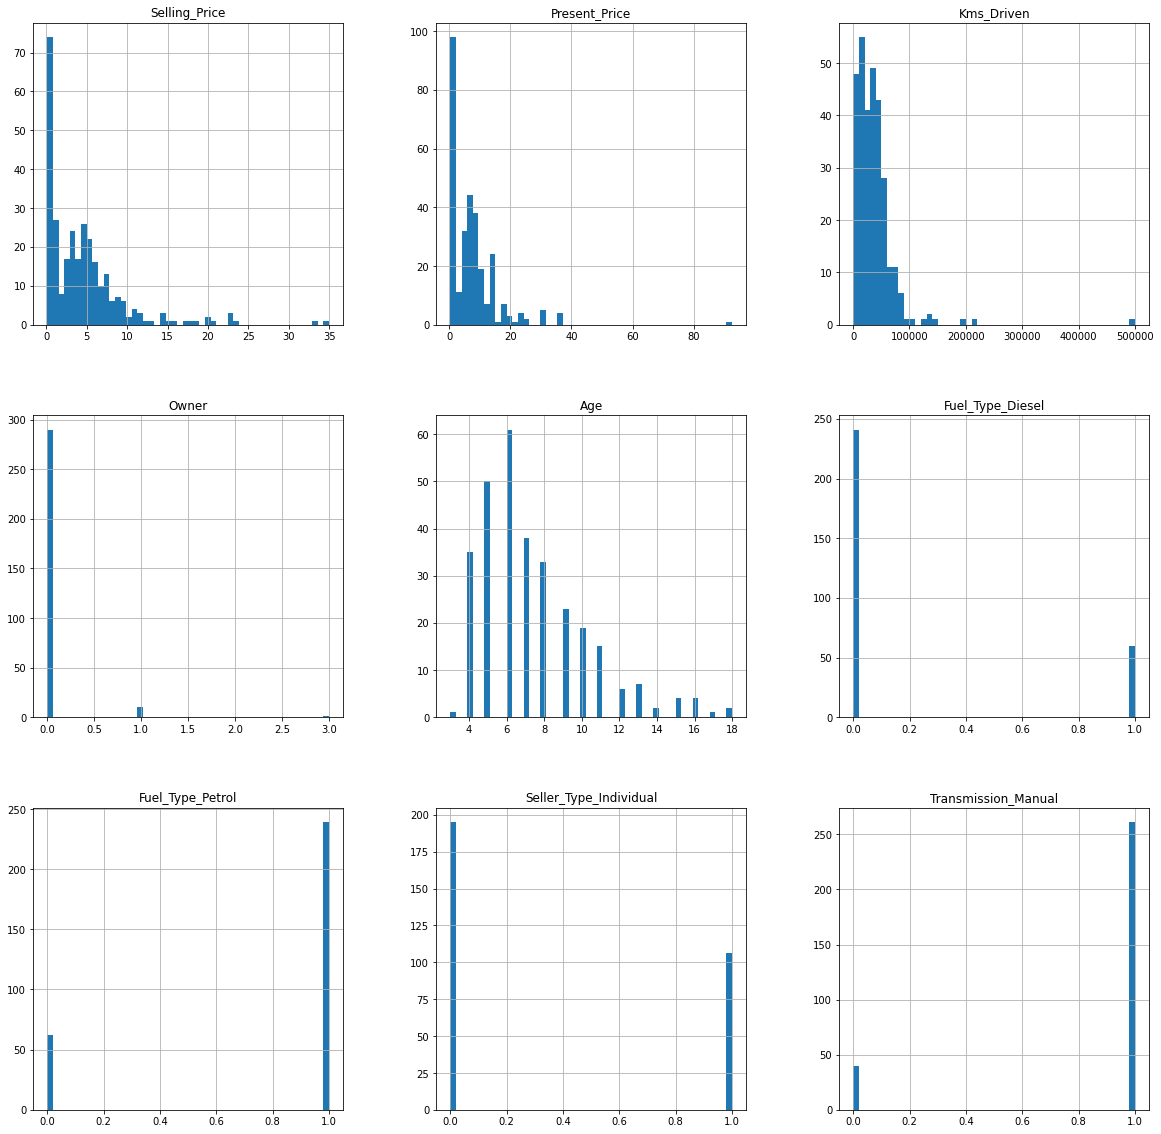

In [16]:
data.hist(bins=50, figsize=(20,20))

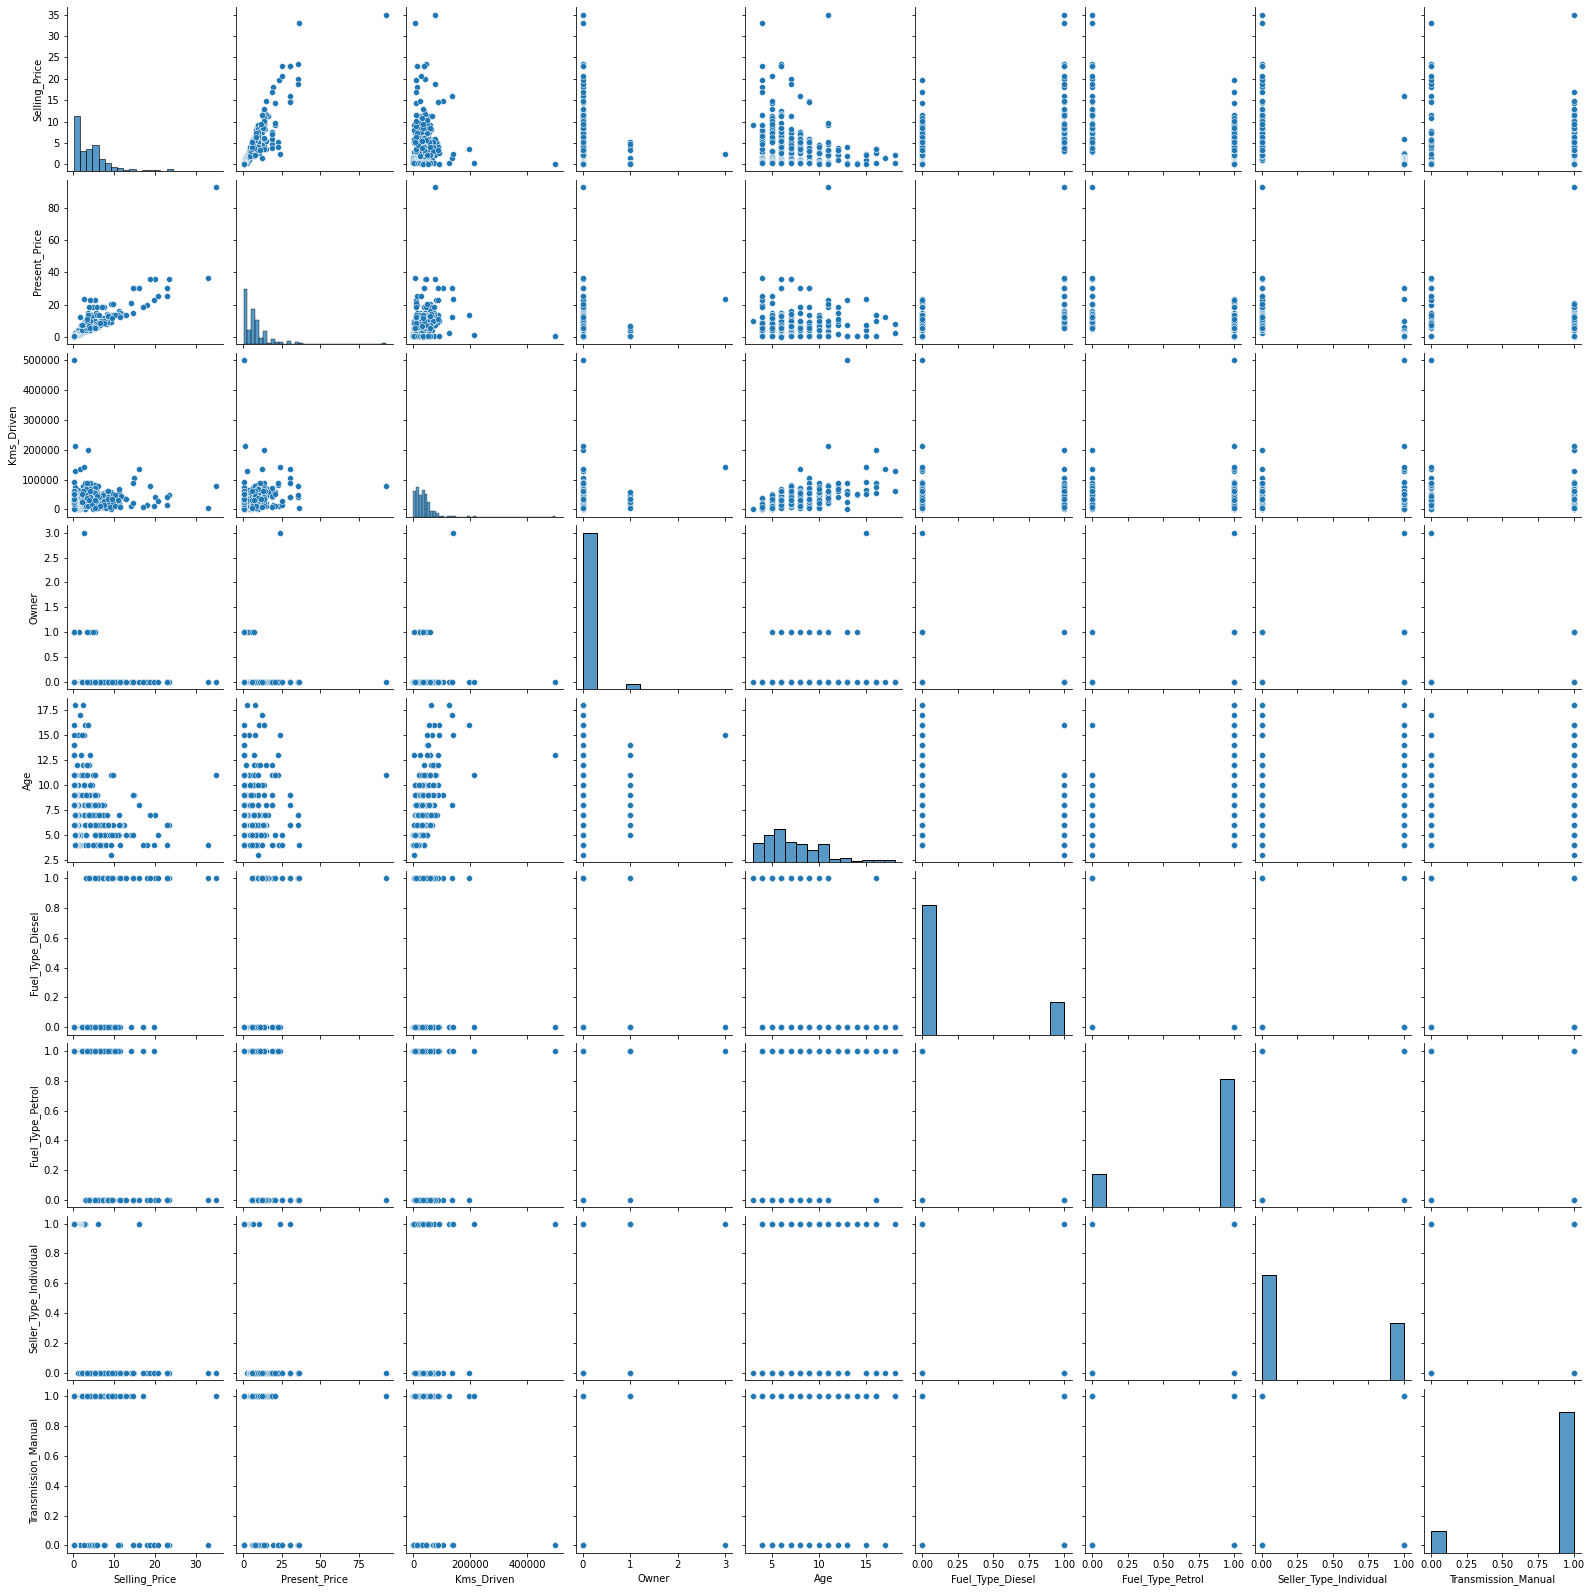

In [17]:
sb.pairplot(data)

<AxesSubplot:>

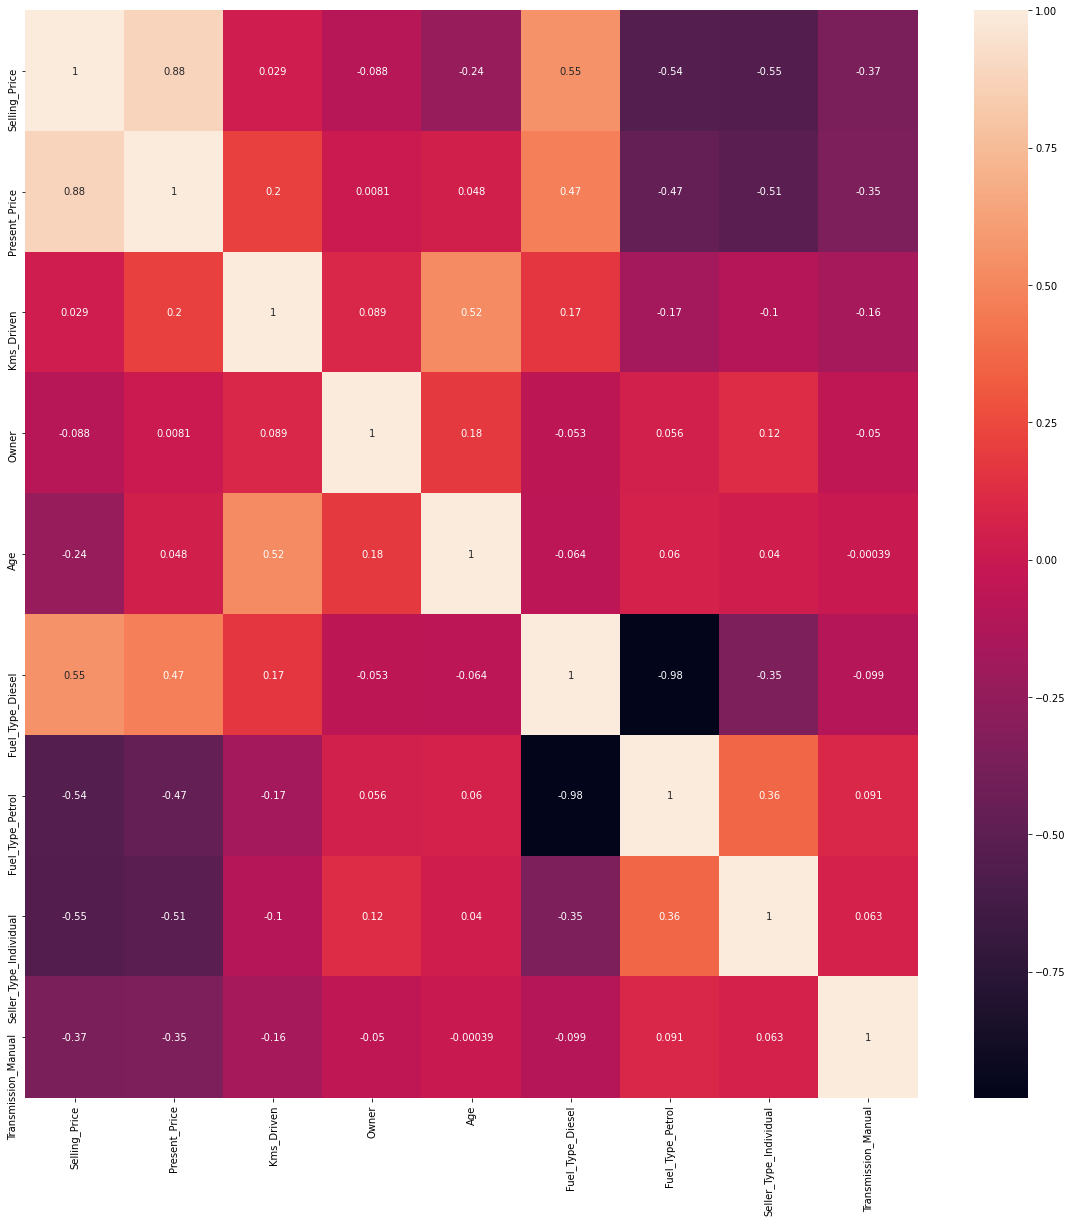

In [18]:
plt.figure(figsize=(20,20))
sb.heatmap(data.corr(),annot=True)

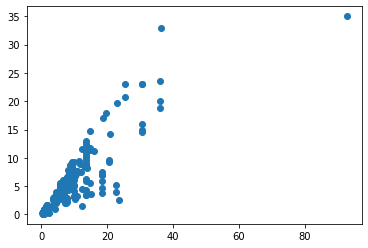

In [19]:
plt.scatter(data['Present_Price'],data['Selling_Price'])

## Train Test Splitting

In [20]:
data.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [21]:
x = data.iloc[:,1:]
y = data.iloc[:,0]

In [22]:
from sklearn.model_selection import train_test_split
x_test,x_train,y_test,y_train = train_test_split(x,y,test_size=0.2,random_state=88)

## Model Creation

In [23]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
model = RandomForestRegressor()

In [24]:
n_estimators = [int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_depth = [int(x) for x in np.linspace(5, 30, num = 6)]
min_samples_split = [2, 5, 10, 15, 20]
min_samples_leaf = [1, 2, 3, 4, 5]
max_features = ['auto', 'sqrt','log2']

In [25]:
grid = {'n_estimators': n_estimators,'max_depth': max_depth,'min_samples_split': min_samples_split,
       'min_samples_leaf': min_samples_leaf,'max_features': max_features}

In [27]:
rf_random = RandomizedSearchCV(model,param_distributions=grid,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)

In [28]:
rf_random.fit(x_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(estimator=RandomForestRegressor(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   scoring='neg_mean_squared_error', verbose=2)

In [29]:
rf_random.best_params_

{'n_estimators': 700,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 5}

In [30]:
rf_random.best_score_

-6.965101671905413

In [31]:
predictions = rf_random.predict(x_test)

In [32]:
from sklearn import metrics

In [34]:
metrics.mean_absolute_error(y_test,predictions)

1.180364869057334

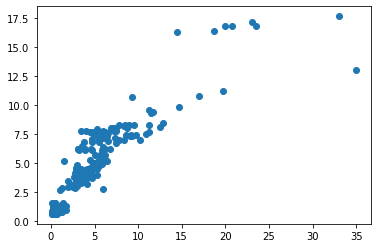

In [35]:
plt.scatter(y_test,predictions)

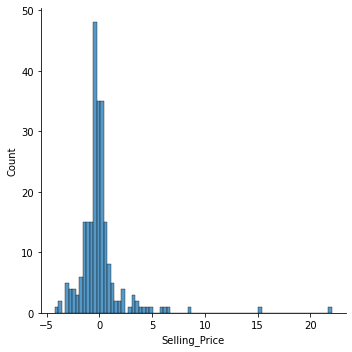

In [36]:
sb.displot(y_test-predictions)